In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def l2_logistic_regression(train_data, test_data, train_labels, test_labels):
    
    # Train model
    model = LogisticRegression(penalty='l2', random_state=42)
    model.fit(train_data, train_labels)    
    
    # Test model
    y_train_pred = model.predict(train_data)
    y_test_pred = model.predict(test_data)

    # Evaluate model
    print('\nLogistic Regression - \nTrain Accuracy: ', round(np.sum(y_train_pred == train_labels) / train_data.shape[0], 4))
    print('Test Accuracy: ', round(np.sum(y_test_pred == test_labels) / test_data.shape[0], 4))

In [3]:
def decision_tree_classifier(train_data, test_data, train_labels, test_labels):

    # Train model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(train_data, train_labels)

    # Test model
    y_train_pred = model.predict(train_data)
    y_test_pred = model.predict(test_data)

    # Evaluate model
    print('\nDecision Tree - \nTrain Accuracy: ', round(np.sum(y_train_pred == train_labels) / train_data.shape[0], 4))
    print('Test Accuracy: ', round(np.sum(y_test_pred == test_labels) / test_data.shape[0], 4))

In [4]:
# Fetch data
mnist_dataset = fetch_mldata('MNIST original')
mnist_data = mnist_dataset.data
mnist_labels = mnist_dataset.target

In [5]:
def generate_rectangles():
    rectangles = []
    i = 0
    
    while i < 100:
        
        # Generate random rectangle
        new_rectangle = [[np.random.randint(27), np.random.randint(27)], [np.random.randint(27), np.random.randint(27)]]
        
        # Skip if rectangle already in list or if rectangle area not between 130 and 170
        if new_rectangle in rectangles or get_rectangle_area(new_rectangle) < 130 or get_rectangle_area(new_rectangle) > 170:
            continue
       
        # Append to list of rectangles
        rectangles.append(new_rectangle)
        i += 1
    
    return rectangles

In [6]:
def get_rectangle_area(rectangle):
    # (x2 - x1) * (y2 - y1)
    return ((abs(rectangle[1][0] - rectangle[0][0])) * (abs(rectangle[1][1] - rectangle[0][1])))

In [7]:
def black(rectangle):
    
    black_matrix = np.zeros((rectangle.shape[0], rectangle.shape[1]))

    for i in range(rectangle.shape[0]):
        if rectangle[i][0] > 0:
            black_matrix[i][0] = black_matrix[i-1][0] + 1 if i > 0 else 1
        
    for j in range(rectangle.shape[1]):
        if rectangle[0][j] > 0:
            black_matrix[0][j] = black_matrix[0][j-1] + 1 if j > 0 else 1
                
    for i in range(1, rectangle.shape[0]):
        for j in range(1, rectangle.shape[1]):
            black_dij = 1 if rectangle[i][j] > 0 else 0
            black_matrix[i][j] = black_matrix[i][j-1] + black_matrix[i-1][j] - black_matrix[i-1][j-1] + black_dij
    
    return black_matrix

In [8]:
rectangles = generate_rectangles()
new_mnist_data = np.zeros((mnist_data.shape[0], 200))

for i in range(len(mnist_data)):
    
    black_matrix = black(mnist_data[i].reshape(28, 28))
    j = 0
    for rectangle in rectangles:
        # Edges of rectangle ABCD
        A = rectangle[0]
        C = rectangle[1]
        B = [rectangle[1][0], rectangle[0][1]]
        D = [rectangle[0][0], rectangle[1][1]]
        
        # Mid-point of edges
        AB = [int((A[0] + B[0]) / 2), A[1]]
        CD = [int((C[0] + D[0]) / 2), C[1]]
        AD = [A[0], int((A[1] + D[1]) / 2)]
        BC = [B[0], int((B[1] + C[1]) / 2)]
        
        new_mnist_data[i][j] = (black_matrix[BC[0], BC[1]] - black_matrix[B[0], B[1]] - black_matrix[AD[0], AD[1]] + black_matrix[A[0], A[1]]) - (black_matrix[C[0], C[1]] - black_matrix[BC[0], BC[1]] - black_matrix[D[0], D[1]] + black_matrix[AD[0], AD[1]])
        new_mnist_data[i][j+1] = (black_matrix[CD[0], CD[1]] - black_matrix[AB[0], AB[1]] - black_matrix[D[0], D[1]] + black_matrix[A[0], A[1]]) - (black_matrix[C[0], C[1]] - black_matrix[B[0], B[1]] - black_matrix[CD[0], CD[1]] + black_matrix[AB[0], AB[1]])
        
        j += 2

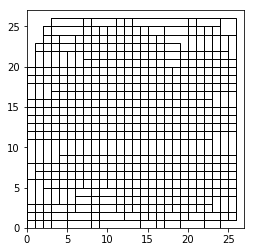

In [9]:
subplot = plt.figure().add_subplot(111, aspect='equal')
for rectangle in rectangles:
    A = rectangle[0]
    C = rectangle[1]
    
    height = C[1] - A[1]
    width = C[0] - A[0]
    
    subplot.add_patch(patches.Rectangle((A[0], A[1]), width, height, fill=False))
    plt.xlim((0, 27))
    plt.ylim((0, 27))

In [10]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_labels, test_size=0.20, random_state=42)

In [11]:
l2_logistic_regression(X_train, X_test, y_train, y_test)
decision_tree_classifier(X_train, X_test, y_trai
                         n, y_test)


Logistic Regression - 
Train Accuracy:  0.9327
Test Accuracy:  0.9179

Decision Tree - 
Train Accuracy:  1.0
Test Accuracy:  0.8737
